In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
import category_encoders as ce
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_selector as selector



In [2]:
signdata = pd.read_csv('/Users/emilkoch/Library/Mobile Documents/com~apple~CloudDocs/Data Files/signdata.csv', encoding='latin-1')

In [3]:
# Separate target variable from features
X = signdata.drop(columns=['SignBankEnglishTranslations'])  # Features

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['List', 'Item', 'EnglishWF(lg10)', 'SignFrequency(M)', 'SignFrequency(SD)', 'SignFrequency(Z)', 'SignFrequency(N)', 'Unknown', 'SignFrequency(M-Native)', 'SignFrequency(SD-Native)', 'SignFreq(Z-native)', 'SignFrequency(N-Native)', 'Unknown(Native)', 'SignFrequency(M-Nonnative)', 'SignFrequency(SD-Nonnative)', 'SignFrequency(N-Nonnative)', 'SignFreq(Z-Nonnative)', 'Unknown(Nonnative)', 'DominantTranslationAgreement', 'DominantTranslationAgreement(Native)', 'DominantTranslationAgreement(Nonnative)', 'Iconicity(M)', 'Iconicity(SD)', 'Iconicity(Z)', 'Iconicity(N)', 'D.Iconicity(M)', 'D.Iconicity(SD)', 'D.Iconicity(N)', 'D.Iconicity(Z)', 'D.Iconicity(M-native)', 'D.Iconicity(SD-native)', 'D.Iconicity(Z-native)', 'D.Iconicity(N-native)', 'GuessConsistency', 'GuessAccuracy', 'Transparency(M)', 'Transparency SD', 'Transparency Z', 'Initialized.2.0', 'FingerspelledLoanSign.2.0', 'Compound.2.0', 'NumberOfMorphemes.2.0', 'SignOnset(ms)', 'SignOffset(ms)', 'SignDuration(ms)', '

In [4]:
# Preprocessing for numerical features
numerical_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Copy numerical columns
X_numerical = X[numerical_cols].copy()
print(len(X_numerical))
print(len(numerical_cols))
print(X_numerical.head())
print(X_numerical.isnull().sum())

2723
129
   List  Item  EnglishWF(lg10)  SignFrequency(M)  SignFrequency(SD)  \
0     1     2            3.521             5.143              2.081   
1     1     3            4.645             6.032              1.516   
2     1     4            2.600             4.429              1.720   
3     1     5            2.928             2.621              1.720   
4     1     8            3.041             1.579              0.838   

   SignFrequency(Z)  SignFrequency(N)  Unknown  SignFrequency(M-Native)  \
0             0.621                21    0.000                    5.167   
1             1.068                31    0.000                    6.111   
2             0.232                21    0.000                    4.167   
3            -0.753                29    0.065                    2.000   
4            -1.198                19    0.095                    1.455   

   SignFrequency(SD-Native)  ...  ThumbContact.2.0Frequency  \
0                     2.167  ...                  

In [5]:
columns_to_drop = [
    'UlnarRotationM4.2.0', 'FlexionChangeM5.2.0', 'SpreadChangeM5.2.0',
    'SignTypeM5.2.0', 'MovementM5.2.0', 'RepeatedMovementM5.2.0',
    'MajorLocationM5.2.0', 'MinorLocationM5.2.0', 'SecondMinorLocationM5.2.0',
    'ContactM5.2.0', 'NonDominantHandshapeM5.2.0', 'UlnarRotationM5.2.0',
    'FlexionChangeM6.2.0', 'SpreadChangeM6.2.0', 'SignTypeM6.2.0',
    'MovementM6.2.0', 'RepeatedMovementM6.2.0', 'MajorLocationM6.2.0',
    'MinorLocationM6.2.0', 'SecondMinorLocationM6.2.0', 'ContactM6.2.0',
    'NonDominantHandshapeM6.2.0', 'UlnarRotationM6.2.0'
]
# Select columns not in columns_to_drop from X_numerical
X_numerical_2 = X_numerical.drop(columns=columns_to_drop)
# Impute missing values and scaling
imputer = SimpleImputer(strategy='median')
X_numerical_imputed = imputer.fit_transform(X_numerical_2) 
scaler = StandardScaler()
X_numerical_scaled  = scaler.fit_transform(X_numerical_imputed)  

In [6]:
# Check for missing values in the DataFrame
missing_values = X[categorical_cols].isnull().sum()
print("Missing values in categorical columns:")
print(missing_values)

# If there are missing values, handle them before preprocessing
if missing_values.sum() > 0:
    # Handle missing values using SimpleImputer with the most frequent strategy
    imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = imputer.fit_transform(X[categorical_cols])

# Define the pipeline for categorical features
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))   # One-hot encode categorical features and produce a dense array
])

# Apply the pipeline to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_pipeline, categorical_cols)
    ],
    remainder='passthrough'  # Include non-categorical columns
)

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X)

# Convert the encoded array to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded) # type: ignore
print(X_encoded_df.isna().sum())

Missing values in categorical columns:
EntryID                     0
LemmaID                     0
Code                        0
Batch                       0
DominantTranslation      2083
                         ... 
SignBankAnnotationID      720
SignBankLemmaID           734
SignBankSemanticField    1846
InCDI                       0
CDISemanticCategory      2155
Length: 61, dtype: int64
0           0
1           0
2           0
3           0
4           0
         ... 
14078       0
14079      26
14080     734
14081    2190
14082    2190
Length: 14083, dtype: int64


In [7]:
# Check data types of all columns in X_encoded_df
data_types = X_encoded_df.dtypes

# Check if any column has a non-numeric data type
non_numeric_columns = data_types[data_types != 'float64'][data_types != 'int64']

# Print any non-numeric columns
if not non_numeric_columns.empty:
    print("Non-numeric columns found after one-hot encoding:")
    print(non_numeric_columns)
else:
    print("All columns are numeric after one-hot encoding.")


All columns are numeric after one-hot encoding.


In [8]:
# Concatenate numerical and encoded categorical columns
X_processed = pd.concat([pd.DataFrame(X_numerical_scaled), X_encoded_df], axis=1)

# Check for missing values in the processed DataFrame
missing_values_processed = X_processed.isnull().sum()
print("Missing values in processed DataFrame:")
print(missing_values_processed)

# Replace NaN values with 0
X_processed.fillna(0, inplace=True)
print(X_processed.isnull().sum())

Missing values in processed DataFrame:
0           0
1           0
2           0
3           0
4           0
         ... 
14078       0
14079      26
14080     734
14081    2190
14082    2190
Length: 14189, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
14078    0
14079    0
14080    0
14081    0
14082    0
Length: 14189, dtype: int64


In [9]:
# Drop NaN values from the target variable
y_cleaned = signdata['SignBankEnglishTranslations'].dropna()

# Index X_processed with the same indices as y_cleaned
X_processed_cleaned = X_processed.loc[y_cleaned.index]

print("Shape of X_processed:", X_processed_cleaned.shape)
print("Shape of y_encoded:", y_cleaned.shape)  # Adjusted to use y_cleaned.shape for consistency

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y_cleaned)

# Check for NaN values in the target variable after dropping
nan_count_after_drop = y_cleaned.isnull().sum()
print("Number of NaN values in 'SignBankEnglishTranslations' column after dropping:", nan_count_after_drop)
# Check for NaN values in X_processed_cleaned after dropping NaN values from the target variable
nan_count_in_processed = X_processed_cleaned.isna().sum()
print('Number of NaN values in X_processed_cleaned:', nan_count_in_processed)

Shape of X_processed: (1984, 14189)
Shape of y_encoded: (1984,)
Number of NaN values in 'SignBankEnglishTranslations' column after dropping: 0
Number of NaN values in X_processed_cleaned: 0        0
1        0
2        0
3        0
4        0
        ..
14078    0
14079    0
14080    0
14081    0
14082    0
Length: 14189, dtype: int64


In [13]:
# Initialize the decision tree classifier
tree_clf = DecisionTreeClassifier()

# Fit the decision tree model to the data
tree_clf.fit(X_processed_cleaned, y_encoded)

# Extract feature importances
feature_importances = tree_clf.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_processed_cleaned .shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_processed_cleaned .shape[1]), X_processed_cleaned.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_cleaned, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances along with feature names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
n = 10  # Number of top features to display
print("Top", n, "most important features:")
print(feature_importance_df.head(n))

Top 10 most important features:
       Feature  Importance
14186    14080    0.003160
21          21    0.003081
14105    13999    0.002935
101        101    0.002931
14068    13962    0.002930
14083    13977    0.002911
22          22    0.002877
10          10    0.002873
1            1    0.002867
14069    13963    0.002855


Class distribution before resampling:
Counter({700: 4, 975: 4, 245: 3, 1514: 3, 1437: 3, 1331: 3, 819: 3, 757: 3, 1217: 3, 1634: 2, 978: 2, 1247: 2, 744: 2, 699: 2, 1670: 2, 992: 2, 670: 2, 1434: 2, 943: 2, 432: 2, 395: 2, 1346: 2, 67: 2, 641: 2, 1019: 2, 1708: 2, 1162: 2, 472: 2, 1290: 2, 575: 2, 945: 2, 439: 2, 1376: 2, 1308: 2, 443: 2, 1496: 2, 1699: 2, 1725: 2, 1586: 2, 352: 2, 467: 2, 312: 2, 630: 2, 1298: 2, 1447: 2, 1712: 2, 449: 2, 1482: 2, 46: 2, 1782: 2, 855: 2, 226: 2, 925: 2, 63: 2, 207: 2, 351: 2, 102: 2, 1591: 2, 762: 2, 79: 2, 1236: 2, 1026: 2, 559: 2, 548: 2, 133: 2, 687: 2, 1117: 2, 1266: 2, 725: 2, 899: 2, 1097: 2, 1286: 2, 994: 2, 1554: 2, 965: 2, 685: 2, 349: 2, 187: 2, 1213: 2, 1171: 2, 1028: 2, 289: 2, 971: 2, 1045: 2, 513: 2, 544: 2, 845: 2, 1581: 2, 1279: 2, 1580: 2, 898: 2, 1423: 2, 1481: 2, 1660: 2, 781: 2, 596: 2, 1173: 2, 1030: 2, 1683: 2, 94: 2, 329: 2, 1752: 2, 911: 2, 633: 2, 1525: 2, 662: 2, 1249: 2, 441: 2, 884: 2, 1509: 2, 934: 2, 569: 2, 827: 2, 199: 

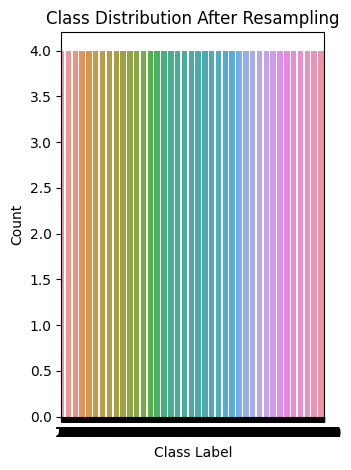

In [17]:
# Print class distribution before resampling
print("Class distribution before resampling:")
print(Counter(y_encoded)) # type: ignore

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X_processed_cleaned, y_encoded)

# Print class distribution after resampling
print("Class distribution after resampling:")
print(Counter(y_resampled))

# Calculate class distribution after resampling
class_counts_after = Counter(y_resampled)

plt.subplot(1, 2, 2)
sns.barplot(x=list(class_counts_after.keys()), y=list(class_counts_after.values()))
plt.title('Class Distribution After Resampling')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [19]:
# Initialize Lasso regularization with alpha parameter (strength of regularization)
lasso = Lasso(alpha=0.1)

# Fit Lasso regularization to the data
lasso.fit(X_resampled, y_resampled)

# Select features with non-zero coefficients
selected_features = SelectFromModel(lasso, prefit=True).get_support()

# Get the names of the selected features
selected_feature_names = X_processed_cleaned.columns[selected_features]

# Print selected features
print("Selected Features (Lasso Regularization):")
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features (Lasso Regularization):
0
2
3
4
5
7
8
9
12
13
16
18
19
20
21
22
23
24
25
26
28
30
31
32
33
35
36
37
38
39
40
41
46
47
48
49
50
52
53
54
55
56
57
58
60
61
62
63
64
66
68
70
74
76
85
86
87
89
90
91
92
93
94
95
96
97
98
104
105
2
4
10
11
15
16
17
19
20
21
24
25
26
27
28
29
30
31
33
34
36
37
38
40
41
42
44
46
47
49
50
54
55
59
60
61
62
64
65
67
68
70
71
73
74
75
77
79
80
85
88
89
90
92
93
95
98
100
102
105
106
111
112
113
114
116
119
122
129
130
132
136
137
145
146
148
156
165
166
169
172
176
179
185
186
187
188
190
196
199
201
204
207
209
212
218
219
223
230
231
235
236
243
244
246
250
252
255
256
257
261
267
272
275
276
283
288
289
290
295
303
305
308
322
325
326
329
332
335
337
340
344
352
355
357
359
363
366
368
374
376
382
385
388
393
402
405
409
411
413
418
422
428
433
440
446
448
458
464
467
472
478
482
483
486
490
493
506
511
523
530
535
536
539
540
543
545
570
582
583
587
599
606
607
611
613
614
615
618
620
621
623
625
627
633
636
642
644
653
654
655
657
663
664


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.452e+08, tolerance: 1.954e+05
  model = cd_fast.enet_coordinate_descent(


In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from transformers import TFDistilBertModel, DistilBertTokenizer
import tensorflow as tf

# Initialize Lasso regularization with alpha parameter (strength of regularization)
lasso = Lasso(alpha=0.1)

# Fit Lasso regularization to the data
lasso.fit(X_resampled, y_resampled)

# Select features with non-zero coefficients
selected_features = SelectFromModel(lasso, prefit=True).get_support()

# Get the names of the selected features
selected_feature_names = X_processed_cleaned.columns[selected_features]

# Filter the dataset to keep only selected features
X_selected = X_resampled[:, selected_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Tokenize input sequences
X_train_tokens = tokenizer(list(X_train), padding=True, truncation=True, return_tensors="tf", max_length=128)
X_test_tokens = tokenizer(list(X_test), padding=True, truncation=True, return_tensors="tf", max_length=128)

# Encode input sequences using DistilBERT
X_train_encoded = model(X_train_tokens).last_hidden_state
X_test_encoded = model(X_test_tokens).last_hidden_state

# Define a simple classification model using TensorFlow
inputs = tf.keras.Input(shape=(X_train_encoded.shape[1], X_train_encoded.shape[2]))
x = tf.keras.layers.GlobalAveragePooling1D()(inputs)
outputs = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(x)
classifier_model = tf.keras.Model(inputs, outputs)

# Compile the model
classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
classifier_model.fit(X_train_encoded, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = classifier_model.predict(X_test_encoded)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
